
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Cristóbal Vivar Vargas

**Rol**: 201723025-8

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

### Distribución de los Datos:

In [6]:
#Desripición de las columnas del DataFrame
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


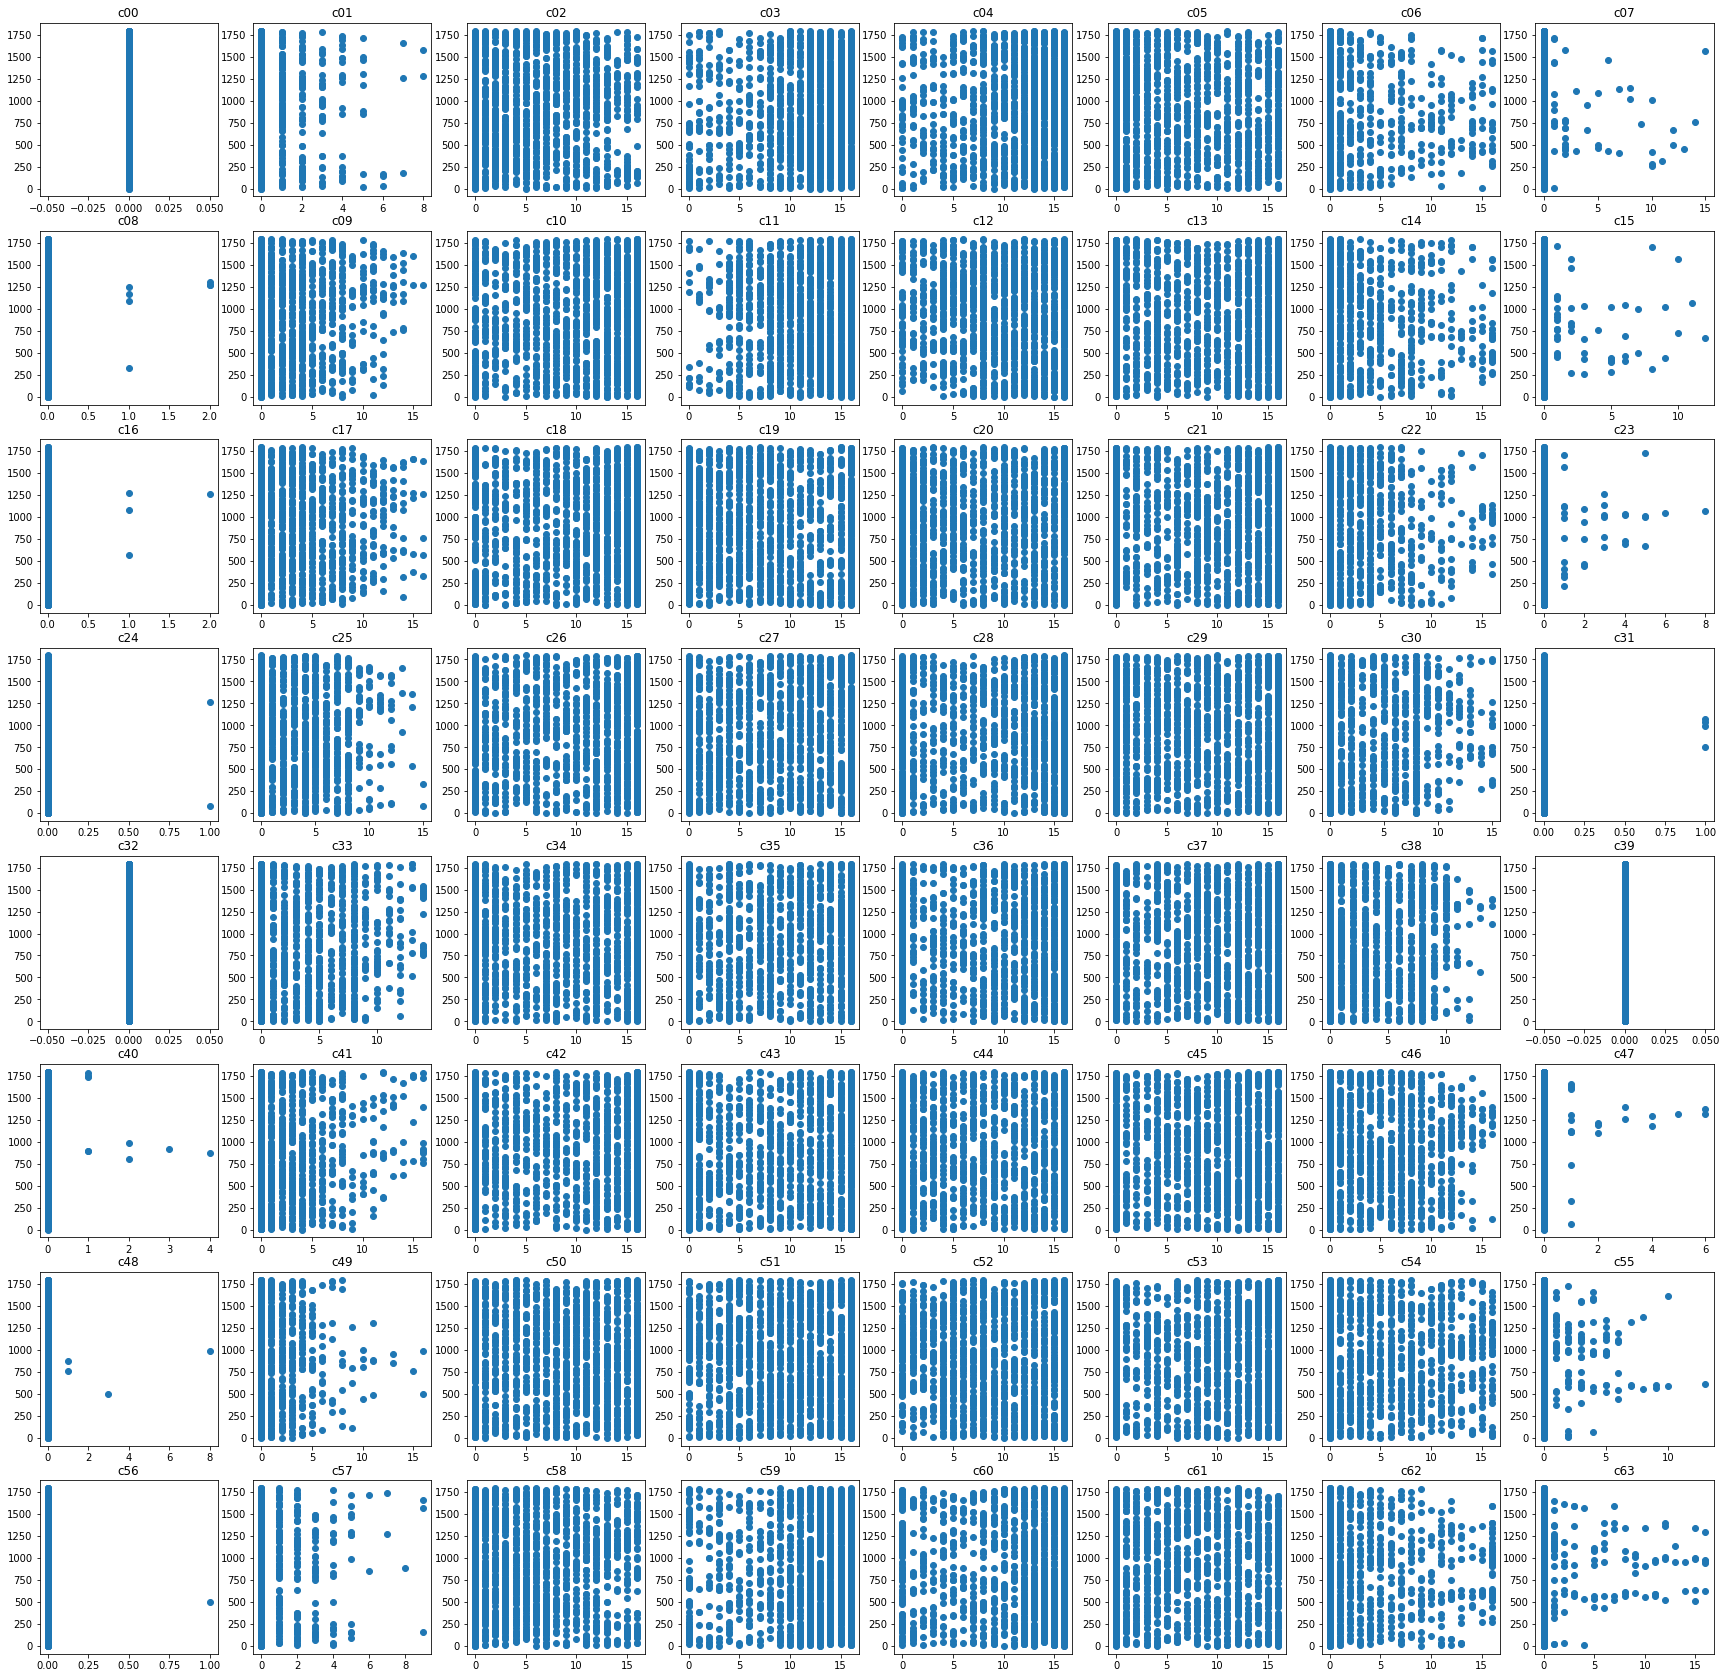

In [7]:
#Grafico de cada columna para ver distribucion de los datos
columnas = digits.columns
y = [i for i in range(len(digits))]
c = 0
fig = plt.figure(figsize = (30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.scatter(digits[columnas[i]], y)
    plt.title(columnas[i])

Se observa que a primera columna de graficos presenta una distribucion cercana a uniforme al igual que la octava, mientras que las demás presentan una distribución bastante aleatoria.

### Memoria:

In [8]:
#Memoria utilizada

import sys
memoria = digits.memory_usage() #Se determina la memoria usada en el DataFrame por columna
memoria

Index      128
c00       7188
c01       7188
c02       7188
c03       7188
          ... 
c60       7188
c61       7188
c62       7188
c63       7188
target    7188
Length: 66, dtype: int64

In [9]:
#Se suma la memoria de cada columna para conocer el total
total = 0
for i in range(0,len(memoria)):
    total += memoria[i] 
print("El DataFrame digits usa un total de:",total, 'bytes')

El DataFrame digits usa un total de: 467348 bytes


### Tipos de Datos:

In [10]:
print(np.array(digits.dtypes))

[dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32') dtype('int32') dtype('int32') dtype('int32')
 dtype('int32')]


In [11]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

Los datos de todas las columnas son enteros

### Registros por clase:

In [12]:
#Se muestra una Dataframe con la cantidad de Registros por clase
clas_reg = (pd.value_counts(digits.target)
            .to_frame()
            .reset_index()
            .sort_values(by = "index")
            .rename(columns = {"index": "Clase", "target": "Cantidad"})
            .reset_index(drop = True)
           )
clas_reg

,Clase,Cantidad
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


### ¿Hay valores NaN's?: 


In [13]:
digits.isnull().sum().sum()

0

O sea, no hay valores NaN en todo el DataFrame

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [14]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

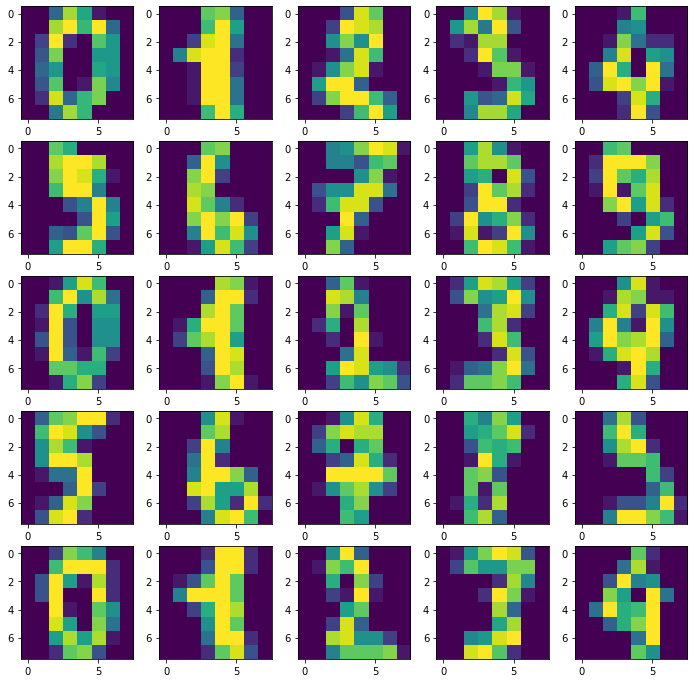

In [15]:
#Se crea una grilla de 5 x 5 
fig, axs = plt.subplots(5, 5, figsize=(12, 12))

#Se itera por las posiciones en la grilla mostrando las imagenes
for i in range(0, 5):
    for j in range(0,5):
        img = digits_dict["images"][j + 5*i] #Se muestran en orden las imagenes
        axs[i,j].imshow(img)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [16]:
import metrics_classification as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import time
X = digits.drop(columns="target").values
y = digits["target"].values

# Regresión Logística:

In [17]:
#Spliteo train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)

print('El train set tiene',len(X_train), 'filas')
print('El test set tiene',len(X_test),'filas')

El train set tiene 1257 filas
El test set tiene 540 filas


In [18]:
# Se importa un Modelo de Regresion Logística
from sklearn.linear_model import LogisticRegression

#Diccionario de Hiper-Parámetros a comparar con gridsearch
metric_lr = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

lr = LogisticRegression()

lr_gridsearchcv = GridSearchCV(estimator = lr, param_grid = metric_lr, cv = 10)

start_time = time.time() #Tiempo de inicio 

lr_grid_result = lr_gridsearchcv.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print(" El modelo se ajustó en %s segundos" % (time.time() - start_time)) 

 El modelo se ajustó en 37.75869584083557 segundos


In [19]:
# Se presenta el mejor score del modelo y los parametros usados para obtener ese score
print("El mejor score tuvo un valor de: %f usando los parametros: \n %s"
      % (lr_grid_result.best_score_, lr_grid_result.best_params_))

El mejor score tuvo un valor de: 0.969778 usando los parametros: 
 {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [20]:
#Predicción del modelo
y_pred = lr_gridsearchcv.predict(X_test)

#Definición de DataFrame para usar en summary_metrics
df_log = pd.DataFrame({
    'y': y_test,   
    'yhat': y_pred
})

print("La matriz de confusión asociada al modelo es: \n \n",confusion_matrix(y_test,y_pred), "\n \n Y las métricas son:")
metrics.summary_metrics(df_log)

La matriz de confusión asociada al modelo es: 
 
 [[55  0  0  0  0  1  0  0  0  0]
 [ 0 53  0  1  0  0  0  0  1  0]
 [ 0  0 60  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  2  0  0  1  1]
 [ 0  2  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  1  0  0  0 49  1  1]
 [ 0  3  1  0  0  2  0  0 48  0]
 [ 0  0  0  1  0  0  0  0  2 52]] 
 
 Y las métricas son:


,accuracy,recall,precision,fscore
0,0.9556,0.9556,0.9568,0.9559


Se observa que las 4 métricas son muy parecidas y cercanas a 1.

# K-Nearest Neighbors:

In [21]:
#Spliteo train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)

print('El train set tiene',len(X_train), 'filas')
print('El test set tiene',len(X_test),'filas')

El train set tiene 1257 filas
El test set tiene 540 filas


In [22]:
# Se importa un Modelo de K-Nearest Neighburs:

from sklearn.neighbors import KNeighborsClassifier

#Diccionario de Hiper-Parámetros a comparar con gridsearch
metric_knn = {
          'n_neighbors' : [3, 6, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)

start_time = time.time() #Tiempo de inicio 

knn_grid_result = knn_gridsearchcv.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print(" El modelo se ajustó en %s segundos" % (time.time() - start_time)) 

 El modelo se ajustó en 11.868819236755371 segundos


In [23]:
# Se presenta el mejor score del modelo y los parametros usados para obtener ese score
print("El mejor score tuvo un valor de: %f usando los parametros: \n %s"
      % (knn_grid_result.best_score_, knn_grid_result.best_params_))

El mejor score tuvo un valor de: 0.986457 usando los parametros: 
 {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [24]:
#Predicción del Modelo:
y_pred = knn_gridsearchcv.predict(X_test)

#Definición de DataFrame para usar en summary_metrics
df_knn = pd.DataFrame({
    'y': y_test,   
    'yhat': y_pred
})

print("La matriz de Confusión asociada al modelo es: \n \n",confusion_matrix(y_test,y_pred))
metrics.summary_metrics(df_knn)

La matriz de Confusión asociada al modelo es: 
 
 [[56  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  1  0  1]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  0  0  1  0  0  0  0 53  0]
 [ 0  0  0  2  1  0  0  0  1 51]]


,accuracy,recall,precision,fscore
0,0.9852,0.9853,0.9851,0.9852


Se observa que las 4 métricas son parecidas y cercanas a 1, incluso más que el modelo de Regresión Logística.

# Decision Tree Classifier:

In [25]:
#Spliteo train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)

print('El train set tiene',len(X_train), 'filas')
print('El test set tiene',len(X_test),'filas')

El train set tiene 1257 filas
El test set tiene 540 filas


In [26]:
# Se importa un Modelo de Regresión de Arboles de Decisión 
from sklearn.tree import DecisionTreeClassifier

#Diccionario de Hiper-Parámetros a comparar con gridsearch
param_DTR = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth': [6,10,15,20,30]
    }
                   
DTC = DecisionTreeClassifier()

DTC_gridsearchcv = GridSearchCV(estimator = DTC, param_grid = param_DTR, cv = 10)

start_time = time.time() #Tiempo de inicio 

DTC_grid_result = DTC_gridsearchcv.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print(" El modelo se ajustó en %s segundos" % (time.time() - start_time)) 

 El modelo se ajustó en 1.8506686687469482 segundos


In [27]:
# Se presenta el mejor score del modelo y los parametros usados para obtener ese score
print("El mejor score tuvo un valor de: %f usando los parametros: \n %s"
      % (DTC_grid_result.best_score_, DTC_grid_result.best_params_))

El mejor score tuvo un valor de: 0.809816 usando los parametros: 
 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'splitter': 'best'}


In [28]:
#Predicción del Modelo:
y_pred = DTC_gridsearchcv.predict(X_test)

#Definición de DataFrame para usar en summary_metrics
df_DTC = pd.DataFrame({
    'y': y_test,   
    'yhat': y_pred
})

print("La matriz de Confusión asociada al modelo es: \n \n",confusion_matrix(y_test,y_pred))
metrics.summary_metrics(df_DTC)

La matriz de Confusión asociada al modelo es: 
 
 [[54  0  0  1  1  0  0  0  0  0]
 [ 0 44  0  0  2  1  2  1  2  3]
 [ 1  3 50  1  0  0  0  1  5  1]
 [ 0  3  2 33  1  7  0  0  3  7]
 [ 1  2  0  1 42  0  0  0  0  1]
 [ 0  0  0  4  0 38  2  0  0  6]
 [ 1  1  1  0  1  5 41  0  2  1]
 [ 0  0  2  1  2  0  0 42  3  2]
 [ 0 11  1  3  2  2  1  0 33  1]
 [ 2  2  1  1  2  4  0  2  5 36]]


,accuracy,recall,precision,fscore
0,0.7648,0.7661,0.7699,0.765


Se observa que las 4 métricas son parecidas pero son peores que los modelos de Regresión logística y KNN

# ¿Cuál modelo es mejor basado en sus métricas?


Se observa que netamente fijándose en las métricas, el mejor modelo es K-Nearest Neighbors con metricas:

In [29]:
metrics.summary_metrics(df_knn)

,accuracy,recall,precision,fscore
0,0.9852,0.9853,0.9851,0.9852


# ¿Cuál modelo demora menos tiempo en ajustarse?


El modelo que se demoró menos en ajustarse fue Decission Tree Classifier con un tiempo de 2.804 segundos

# ¿Qué modelo escoges?

Personalmente encuentro que el modelo de K-Nearest Neighbors es la elección correcta pues sus mpetricas fueron las mejores y su tiempo de ejecución fue razonable, así que elegiré este.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [30]:
#Cross Validation
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=knn_gridsearchcv,
                            X=X_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.98, 1.0, 0.99, 0.98, 0.98, 0.99, 0.98, 0.99, 0.95, 0.99] 
Precision promedio:  0.983 +/-  0.013


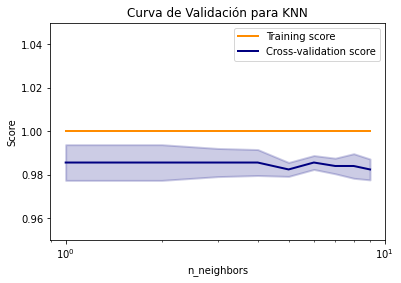

In [31]:
#Curva de validación (copiado del link del enunciado)

from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range(1,10)])

# Validation curve 
# Se utilizan los mejores hiperparámetros encontrado en el ejercicio 3 menos n_neighbors
# pues este se varía en la curva de validación
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'distance'), #
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Curva de Validación para KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.ylim(0.95, 1.05)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.show()

Se observa que la línea de training score es perfecta e igual a 1 pues el modelo KNN guarda en la memoria todo el train set y luego lo ocupa para predecir. Por lo tanto, al predecir con el train set, ya tiene exactamente su cluster apropiado.

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=digits["target"].unique())
n_classes = y.shape[1]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    train_size = 0.7,
                                                    random_state=1998)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'distance'))
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

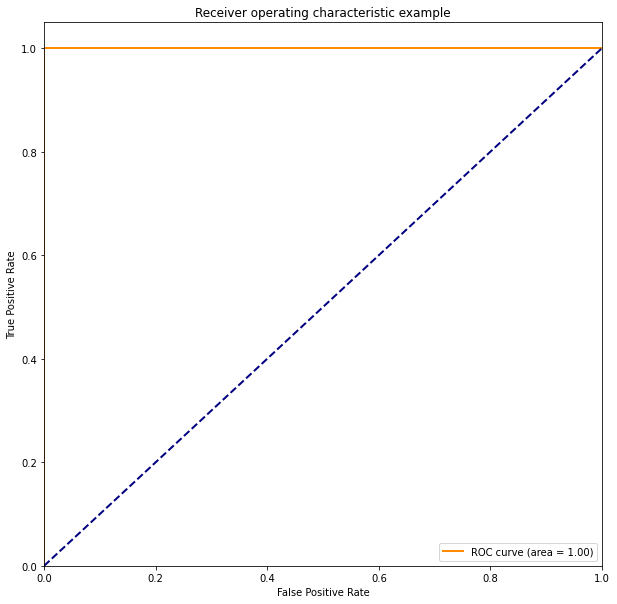

In [33]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

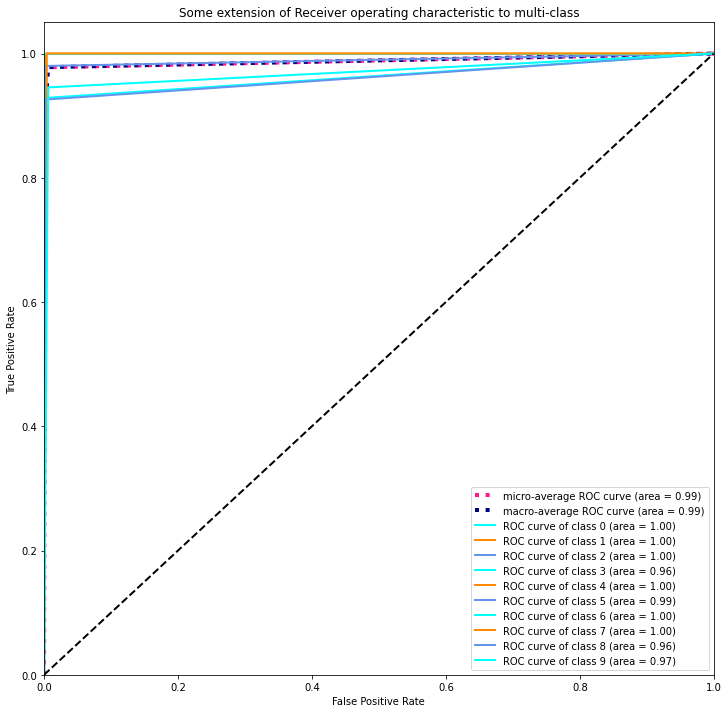

In [34]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Se observa que la curva es cercana a perfecta para casi todas las clases debido a lo explicado en el gráfico anterior. Habiendo dicho esto, las curvas con una leve inclinación, se deben a que el modelo aun si fue bastante bueno en las métricas, no las tuvo perfectas.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


# Selección de Atributos:

In [35]:
#Notar que las columnas que se presentan tienen un solo valor constante igual a 0
print(digits["c00"].unique())
print(digits["c32"].unique())
print(digits["c39"].unique())

[0]
[0]
[0]


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_training = digits.drop(['c00','c32','c39','target'], axis=1) #Se dropean las columnas constantes mencionadas anteriormente
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 20  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

In [37]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
digits_atributos = digits[atributos + ["target"]]
print("Las columnas seleccionadas por la prueba F son:\n",atributos)

Las columnas seleccionadas por la prueba F son:
 ['c02', 'c10', 'c13', 'c20', 'c21', 'c26', 'c28', 'c30', 'c33', 'c34', 'c36', 'c38', 'c42', 'c43', 'c44', 'c46', 'c54', 'c58', 'c60', 'c61']


# Comparativas (Selección de atributos):

In [38]:
dfs_size = [digits.size,digits_atributos.size]
print("digits Original tenía", dfs_size[0], "elementos")
print("digits_atributos tiene", dfs_size[1], "elementos")

digits Original tenía 116805 elementos
digits_atributos tiene 37737 elementos


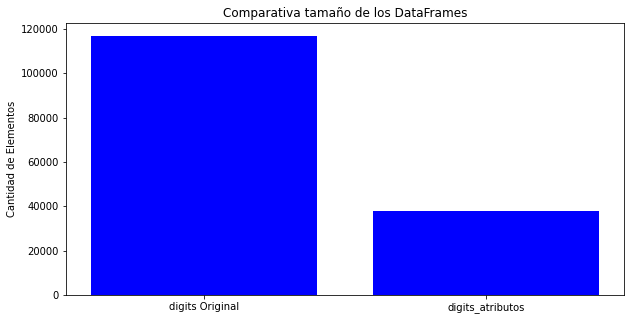

In [39]:
fig = plt.figure(figsize=(10,5))
plt.bar(x =["digits Original", "digits_atributos"], height = dfs_size, color = "blue" )
plt.title("Comparativa tamaño de los DataFrames")
plt.ylabel("Cantidad de Elementos")
plt.show()

In [40]:
#Se suma la memoria de cada columna para conocer el total
total2 = 0
memoria = digits_atributos.memory_usage() #Se determina la memoria usada en el DataFrame nuevo por columna
for i in range(0,len(memoria)):
    total2 += memoria[i]
print("El DataFrame digits_atributos usa un total de:",total2, 'bytes') 
print('En comparación el DataFrame original usaba un total de:', total, 'bytes')

El DataFrame digits_atributos usa un total de: 151076 bytes
En comparación el DataFrame original usaba un total de: 467348 bytes


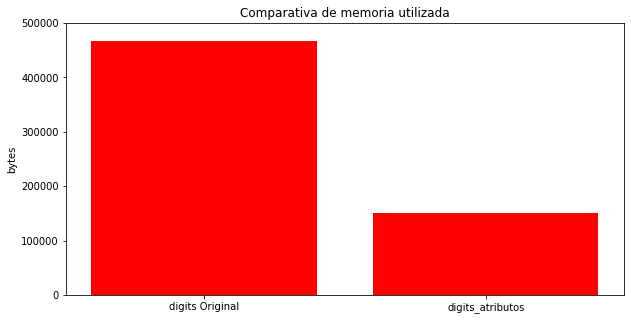

In [41]:
lista = [1e5 * i for i in range(6)]
fig = plt.figure(figsize=(10,5))
plt.bar(x = ["digits Original", "digits_atributos"], height = [total,total2],color = "red")
plt.yticks(lista)
plt.title("Comparativa de memoria utilizada")
plt.ylabel("bytes")
plt.show()

In [42]:
X = digits.drop("target",axis = 1)
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)
start_time = time.time()
knn_gridsearchcv.fit(X_train, y_train)
# Se presenta el tiempo en que se ejecutó el modelo con el dataset original
time_original = time.time() - start_time
print(" El modelo se ejecutó en %s segundos con el DataFrame Original" % (time_original)) 

 El modelo se ejecutó en 13.725930452346802 segundos con el DataFrame Original


In [43]:
#Spliteo train-test con el dataframe digits_pca
X = digits_atributos.drop("target",axis=1)
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)
start_time = time.time()
knn_gridsearchcv.fit(X_train, y_train)
# Se presenta el tiempo en que se ejecutó el modelo con el dataframe digits_pca
time_atributos = time.time() - start_time
print(" El modelo se ejecutó en %s segundos con el DataFrame digits_atributos" % (time_atributos)) 

 El modelo se ejecutó en 6.333903074264526 segundos con el DataFrame digits_atributos


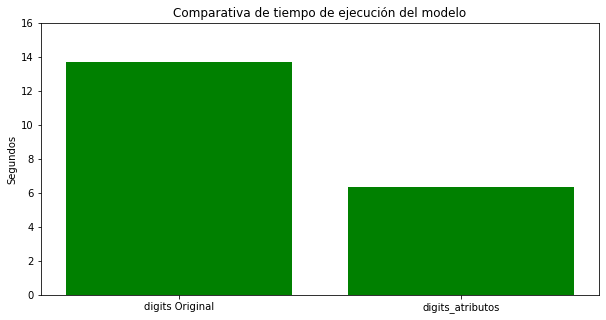

In [44]:
lista = [2 * i for i in range(9)]
fig = plt.figure(figsize=(10,5))
plt.bar(x = ["digits Original", "digits_atributos"], height = [time_original,time_atributos],color = "green")
plt.yticks(lista)
plt.title("Comparativa de tiempo de ejecución del modelo")
plt.ylabel("Segundos")
plt.show()

# Extracción de atributos:

In [45]:
from sklearn.preprocessing import StandardScaler

#Se estandarizan los datos pues pca es suceptible a la distribucion de los datos
x = digits.drop("target",axis =1).values
y = digits["target"].values

x = StandardScaler().fit_transform(x)

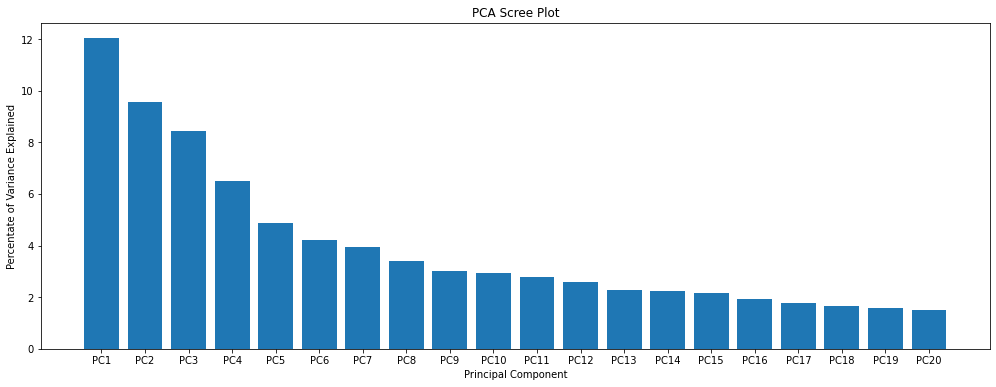

In [46]:
# Se ajusta el modelo 
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f"PC{i}" for i in range(1,n_components+1)]

plt.figure(figsize=(17,6))
plt.bar(x= range(1,n_components+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

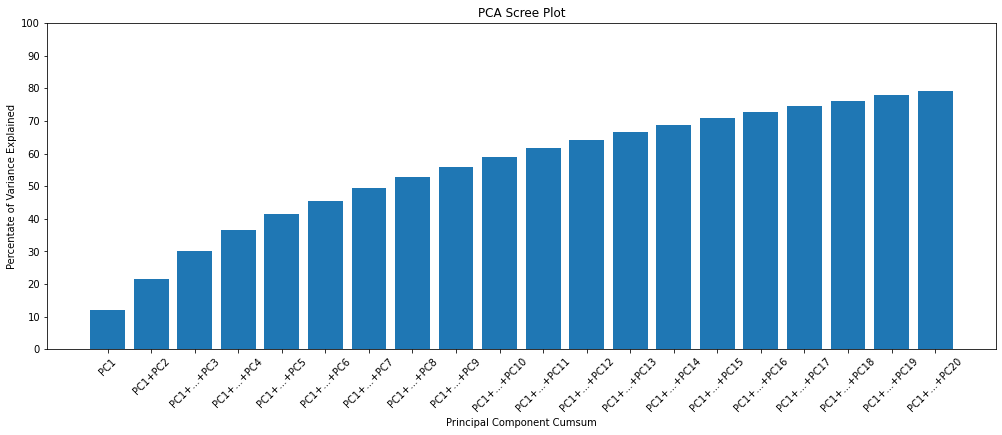

In [47]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns_sum =[f"PC1+...+PC{i+1}" for i in range(2,n_components)]
columns_sum = ["PC1", "PC1+PC2"] + columns_sum

plt.figure(figsize=(17,6))
plt.bar(x= range(1,n_components+1), height=percent_variance_cum, tick_label=columns_sum)
plt.ylabel('Percentate of Variance Explained')
plt.yticks([10*i for i in range(11)])
plt.xlabel('Principal Component Cumsum')
plt.xticks(rotation =45)
plt.title('PCA Scree Plot')
plt.show()

In [48]:
principalDataframe = pd.DataFrame(data = principalComponents, columns = columns)
targetDataframe = digits[['target']]

digits_pca = pd.concat([principalDataframe, targetDataframe],axis = 1)
digits_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,1.914215,-0.954497,-3.946064,2.028670,-0.267161,0.530117,-1.415035,1.496174,0.125895,-0.824642,...,-0.790593,0.225994,-0.192049,0.837479,0.106619,0.175622,-0.095969,0.400614,0.415372,0
1,0.588987,0.924651,3.924753,-1.779732,-0.993446,-0.676011,1.880607,0.555701,1.083029,0.087252,...,0.638853,-0.048326,-0.387400,-0.744111,-0.199147,-0.141913,-0.465808,0.574019,-0.026911,1
2,1.302034,-0.317224,3.023394,-2.043418,-2.081171,0.935461,-1.298484,1.157427,0.782513,-1.097144,...,-2.309111,-0.561456,-1.010280,-1.164457,0.389106,-0.199333,-0.435577,-1.091704,-1.126437,2
3,-3.020768,-0.868767,-0.801801,-2.187152,-0.556674,0.726502,0.960608,-1.381593,0.263223,0.738905,...,0.488346,-0.168266,1.012937,-0.143730,-0.996820,-0.982296,-0.431556,1.464441,0.262783,3
4,4.528948,-1.093447,0.973111,-1.419399,-1.715134,1.432104,1.073915,-0.970207,-1.664198,1.177730,...,-1.357037,-0.349243,-0.102103,0.730970,0.210076,-0.089130,-0.566317,1.666928,1.115762,4


# Comparativas (Extracción de atributos):

In [49]:
dfs_pca_size = [digits.size,digits_pca.size]
print("digits Original tenía", dfs_pca_size[0], "elementos")
print("digits_atributos tiene", dfs_pca_size[1], "elementos")

digits Original tenía 116805 elementos
digits_atributos tiene 37737 elementos


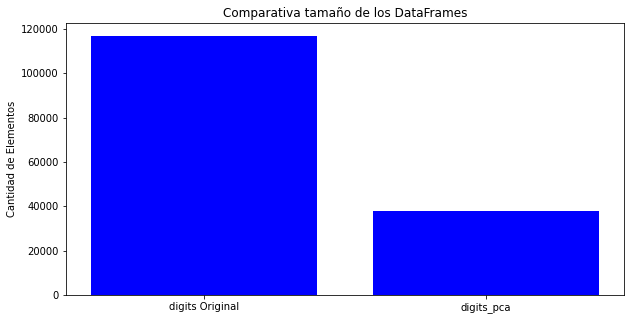

In [50]:
fig = plt.figure(figsize=(10,5))
plt.bar(x =["digits Original", "digits_pca"], height = dfs_pca_size, color = "blue" )
plt.title("Comparativa tamaño de los DataFrames")
plt.ylabel("Cantidad de Elementos")
plt.show()

In [51]:
#Se suma la memoria de cada columna para conocer el total
total3 = 0
memoria = digits_pca.memory_usage() #Se determina la memoria usada en el DataFrame nuevo por columna
for i in range(0,len(memoria)):
    total3 += memoria[i]
print("El DataFrame digits_pca usa un total de:",total2, 'bytes') 
print('En comparación el DataFrame original usaba un total de:', total, 'bytes')

El DataFrame digits_pca usa un total de: 151076 bytes
En comparación el DataFrame original usaba un total de: 467348 bytes


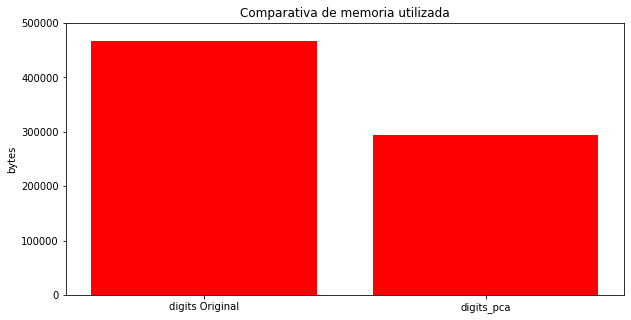

In [52]:
lista = [1e5 * i for i in range(6)]
fig = plt.figure(figsize=(10,5))
plt.bar(x = ["digits Original", "digits_pca"], height = [total,total3],color = "red")
plt.yticks(lista)
plt.title("Comparativa de memoria utilizada")
plt.ylabel("bytes")
plt.show()

In [53]:
X = digits.drop("target",axis = 1)
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)
start_time = time.time()
knn_gridsearchcv.fit(X_train, y_train)
# Se presenta el tiempo en que se ejecutó el modelo con el dataset original
time_original = time.time() - start_time
print(" El modelo se ejecutó en %s segundos con el DataFrame Original" % (time_original)) 

 El modelo se ejecutó en 13.772732257843018 segundos con el DataFrame Original


In [54]:
#Spliteo train-test con el dataframe solo con atributos
X = digits_pca.drop("target",axis=1)
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1998)
start_time = time.time()
knn_gridsearchcv.fit(X_train, y_train)
# Se presenta el tiempo en que se ejecutó el modelo con el dataset solo con atributos
time_pca = time.time() - start_time
print(" El modelo se ejecutó en %s segundos con el DataFrame digits_pca" % (time_pca)) 

 El modelo se ejecutó en 6.388386964797974 segundos con el DataFrame digits_pca


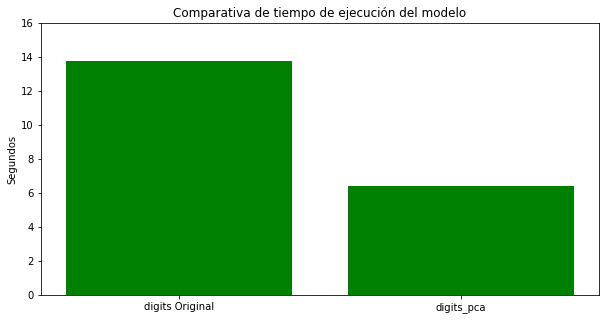

In [55]:
lista = [2 * i for i in range(9)]
fig = plt.figure(figsize=(10,5))
plt.bar(x = ["digits Original", "digits_pca"], height = [time_original,time_pca],color = "green")
plt.yticks(lista)
plt.title("Comparativa de tiempo de ejecución del modelo")
plt.ylabel("Segundos")
plt.show()

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [56]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = model.predict(X_test)
    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < X_aux.shape[0]:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
                ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

## El valor predicho y original son iguales:

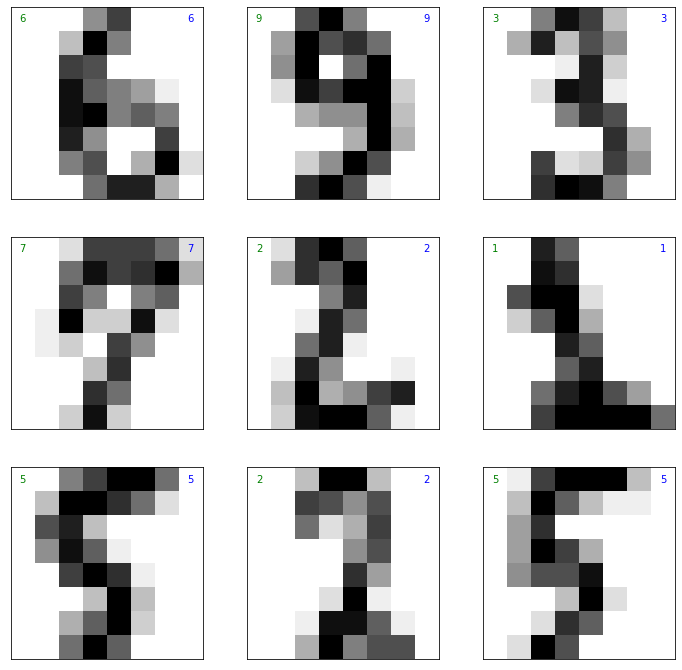

In [57]:
mostar_resultados(digits,model = KNeighborsClassifier() ,nx=3, ny=3,label = "correctos")

## El valor predicho y original son distintos:

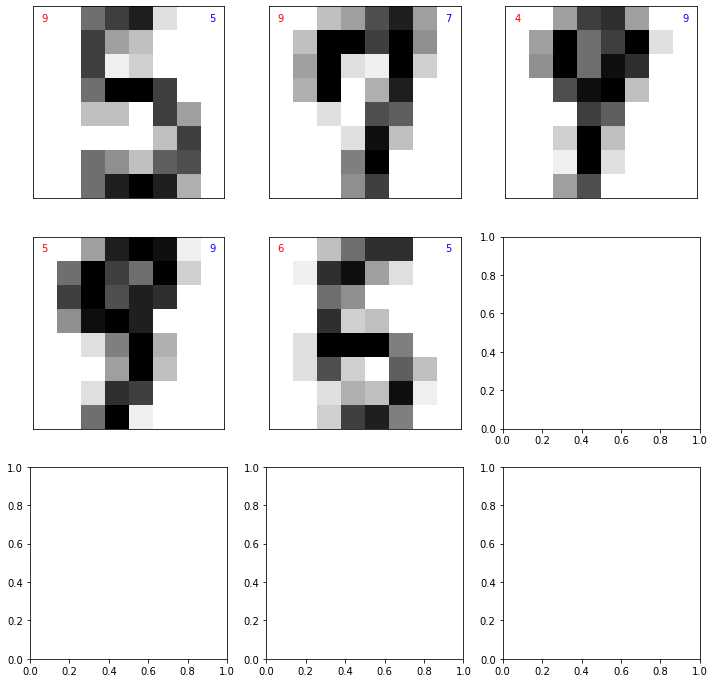

In [58]:
mostar_resultados(digits,model = KNeighborsClassifier() ,nx=3, ny=3,label = "incorrectos")

Las fallas pueden deberse a la similaridad en la forma de los numeros en los que se falló predecir, por ejemplo, el numero 6 y el 5 tienen una forma bastante parecida (bastaría conectar la linea inferior del 5 verticalmente hacia arriba para obtener un 6). Las fallas también pueden deberse a que los numeros en los que se fallo están bastante mal dibujados, a simple vista no es muy fácil ver a que numeros corresponden los dibujos. Así, como el modelo KNN no obtuvo metricas perfectas, es suceptible a fallar cuando los numeros son dificiles de leer.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Como no entiendo lo que hay que hacer en esta pregunta (¿Veredicto de qué?, ¿Cúales preguntas iniciales?) responderé las dificultados que tuve:

* En varias partes de la tarea me costó mucho entender que había que hacer, los ejemplos de los links eran muy dificiles de entender y no comprendo lo que pedían los ejercicios en algunas partes.
* Algunos enunciados sentí que eran muy poco explicativos, dejaban demasiado a mi interpretación, así que me costó empezar a hacer las cosas pues no sabía si lo que estaba haciedo era lo que se pedía.
* La función mostrar_resultados no funcionaba como estaba entregada, la tuve que arreglar a ensayo y error.
* Debido a que la tarea fue mandada a final de semestre, me costó demasiado encontrar tiempo para escribir tanto código y entender que estaba haciendo. El haber tenido solo dos ramos de programación antes (que eran sumamente más introductorios y simples y/o no enfocados a python que este) significó que gran cantidad de la tarea tuve que pedir ayuda a harta gente.
* La tarea no era corta por donde se viera.
* Tener además un proyecto en paralelo a la tarea afectó aun más el tiempo que tengo para todo (los demás ramos, tiempo libre, estudiar para las muchas pruebas que hay, etc)

A modo de conclusión, me costó mucho entender el objetivo de cada ejercicio, pero despues de terminarlos puedo decir lo siguiente:

* Entre los 3 modelos que probé, el mejor a mi criterio era K-Nearest Neighbors
* La busqueda de los hiper parámetros óptimos toma bastante tiempo de ejecución de lo que es usual en lo demás del ramo
* Ojalá para versiones futuras del ramo se pueda explicar un poco más lo que hay que hacer en los ejercicios de  las tareas, o porqué se está haciendo.